# Panorama

In this notebook, I will learn about the how to merge all seperated images into a single panorama.
Use case of this is, in autonomous cars, all the camera images are merged into single image by this process.
To create a panorama , the steps are : 
1. Find the keypoints from all the image
2. Finding the pairwise correspondence
3. Estimating pairwise estimation for homographies
4. Refine the homographies
5. Merge the photos 

## Importing libraries

In [1]:
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline

## Downloading asset

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"
asset_zip_path = os.path.join(os.getcwd()+"/images", f"opencv_bootcamp_assets_NB9.zip") 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

## Reading the images

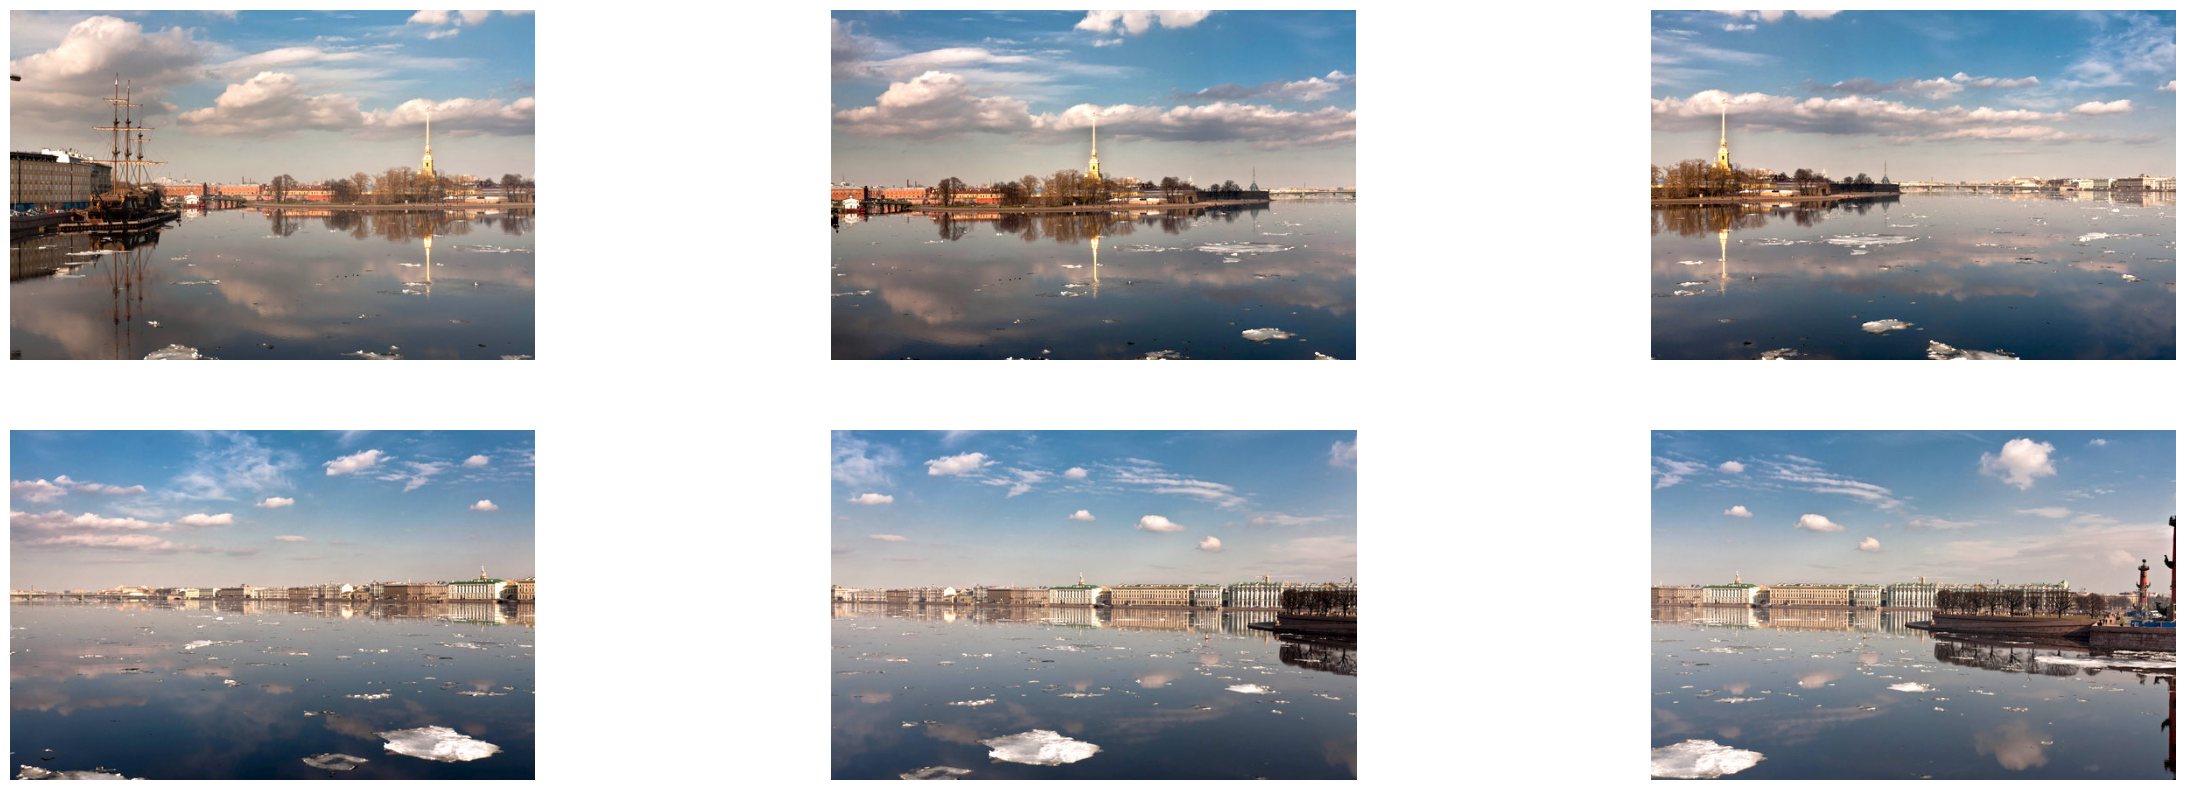

In [4]:
imagefiles = glob.glob(f"images/boat{os.sep}*")
imagefiles.sort()


images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis("off")
    plt.imshow(images[i])

## Creating the panorama

Opencv has `sticher` class that does all the calculation for panorama

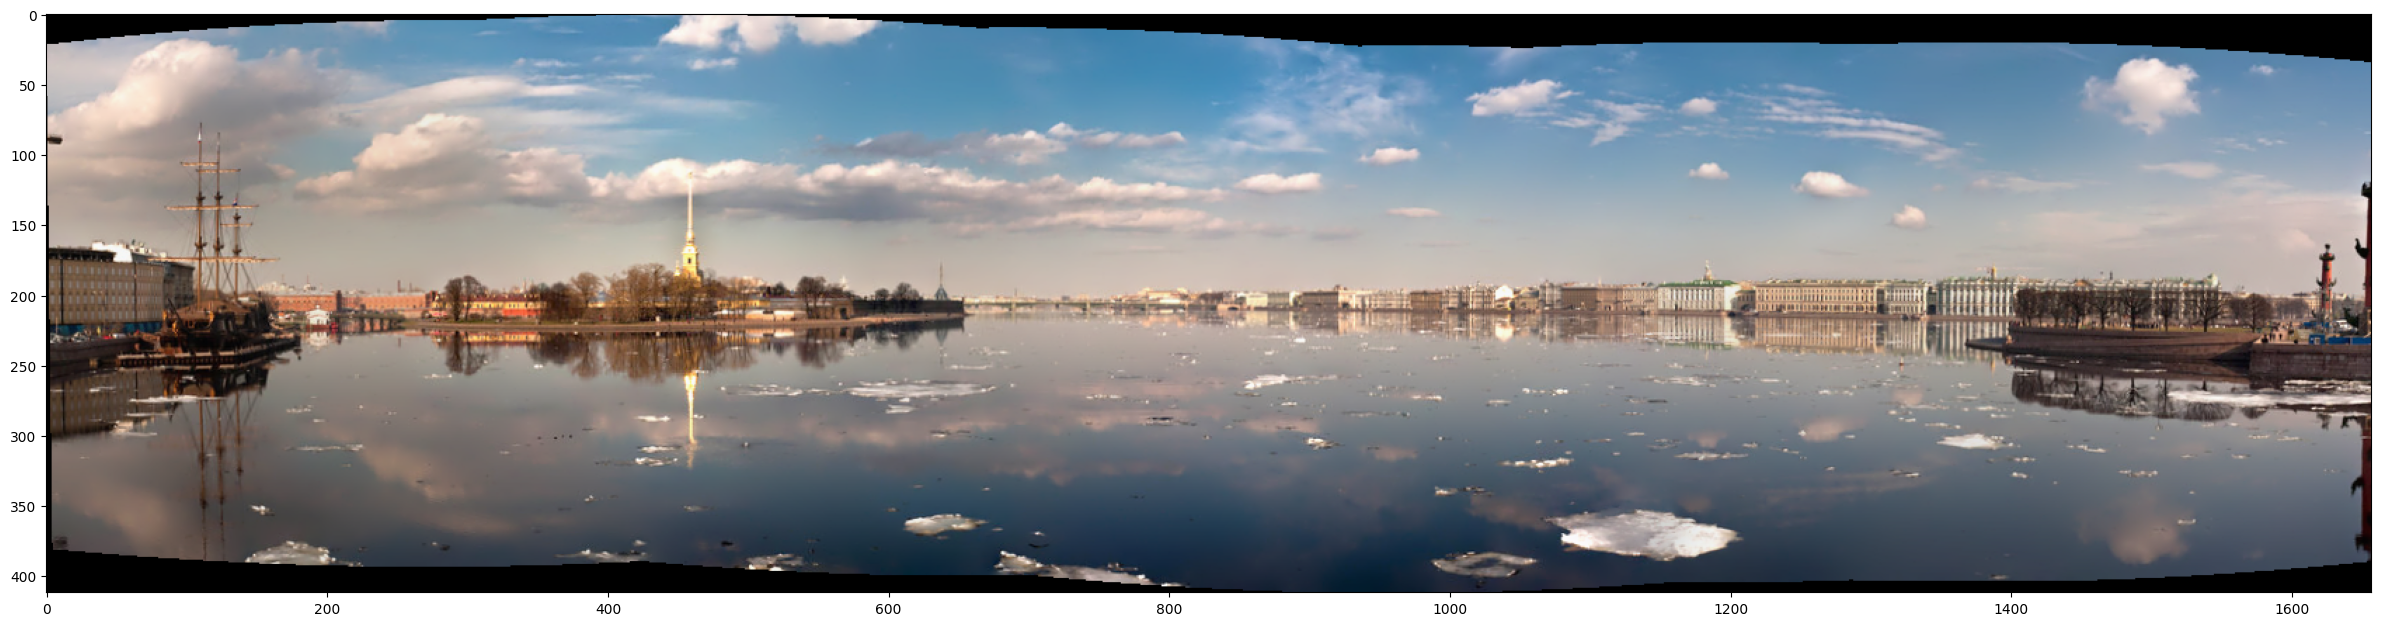

In [5]:
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)